# Hypertension prediction

## Problem Definition
> To predict the patient who have hypertension by visualizing and going through different parameters and features. The role of this model is to correctly predict the patient having hypertension.

## Data
**The dataset for the following problem can be found at `KAGGLE`.**

https://www.kaggle.com/datasets/miadul/hypertension-risk-prediction-dataset?select=hypertension_dataset.csv

## Data dictionary
🏷️ Column Name	    |    📝 Description
*     Age	           Patient's age (in years)
*     Salt_Intake	   Daily salt intake (in grams) – a major contributor to high BP
*     Stress_Score	   Scale of 0–10 measuring psychological stress level
*      BP_History	   Previous blood pressure status: Normal, Prehypertension, Hypertension
*      Sleep_Duration	Average sleep hours per day
*        BMI	           Body Mass Index (weight/height-based obesity measure)
*      Medication	   Medication type: None, Beta Blocker, Diuretic, ACE Inhibitor, Other
*      Family_History	  Family history of hypertension: Yes / No
*      Exercise_Level	  Physical activity level: Low, Moderate, High
*      Smoking_Status	  Whether the patient is a Smoker or Non-Smoker
*      Has_Hypertension	  Target variable: Indicates presence of hypertension (Yes/No)

## Evaluation
**Evaluate using Accuracy, F1 Score, ROC-AUC, and confusion matrix**

In [1]:
#Importing all the useful libraries and packages for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset
data=pd.read_csv("hypertension_dataset.csv",low_memory=False)
data.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [3]:
data.columns

Index(['Age', 'Salt_Intake', 'Stress_Score', 'BP_History', 'Sleep_Duration',
       'BMI', 'Medication', 'Family_History', 'Exercise_Level',
       'Smoking_Status', 'Has_Hypertension'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


In [5]:
data.shape

(1985, 11)

In [6]:
data.describe

<bound method NDFrame.describe of       Age  Salt_Intake  Stress_Score       BP_History  Sleep_Duration   BMI  \
0      69          8.0             9           Normal             6.4  25.8   
1      32         11.7            10           Normal             5.4  23.4   
2      78          9.5             3           Normal             7.1  18.7   
3      38         10.0            10     Hypertension             4.2  22.1   
4      41          9.8             1  Prehypertension             5.8  16.2   
...   ...          ...           ...              ...             ...   ...   
1980   56         10.2             0           Normal             6.5  25.0   
1981   29          8.9             4     Hypertension             6.9  16.9   
1982   64          5.9             9           Normal             5.6  18.9   
1983   35          7.4             8  Prehypertension             8.2  29.2   
1984   38          7.3             0           Normal             8.3  18.6   

         Medicati

In [7]:
data.isna().sum()

Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64

In [8]:
#Checking the sampling distribution of the target column and variables
dict={}
for val in data["Has_Hypertension"]:
    if val == "Yes":
        dict["Yes"]=dict.get("Yes",0)+1
    else:
        dict["No"]=dict.get("No",0)+1
print(dict)

{'Yes': 1032, 'No': 953}


In [9]:
data["Medication"].dtype

dtype('O')

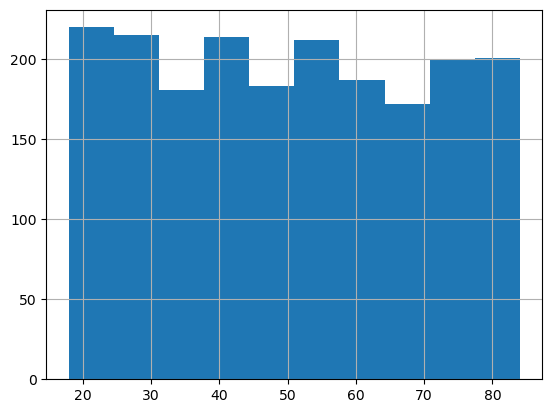

In [10]:
data["Age"].hist();

In [11]:
pd.crosstab(data["Age"],data["Has_Hypertension"]).head()

Has_Hypertension,No,Yes
Age,,
18,21,14
19,23,16
20,19,12
21,17,8
22,19,17


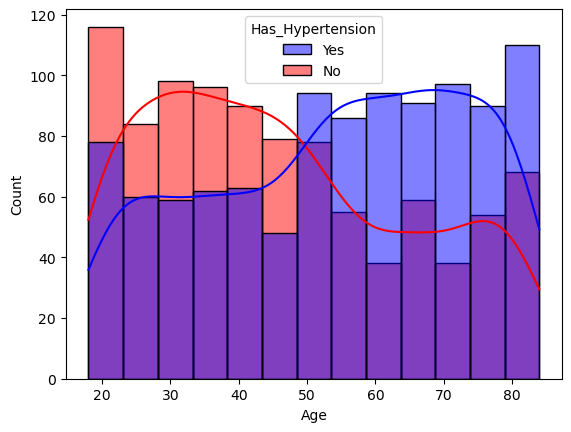

In [12]:
sns.histplot(data,x='Age',hue='Has_Hypertension',kde=True,palette={'No':'Red','Yes':'Blue'});

**So from this visualization we can say that aged/old people have more hypertension than youths.**

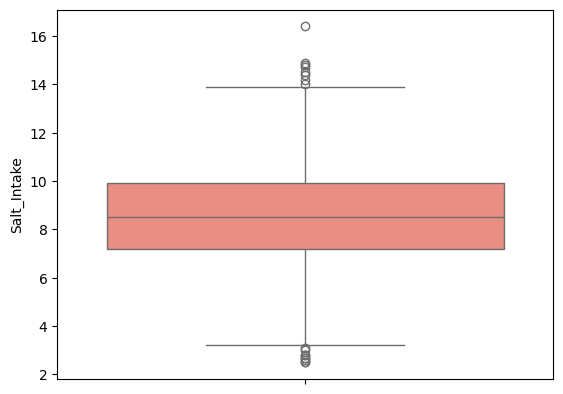

In [13]:
#Lets see distribution of the salt intake in patients
sns.boxplot(data['Salt_Intake'],color="salmon");

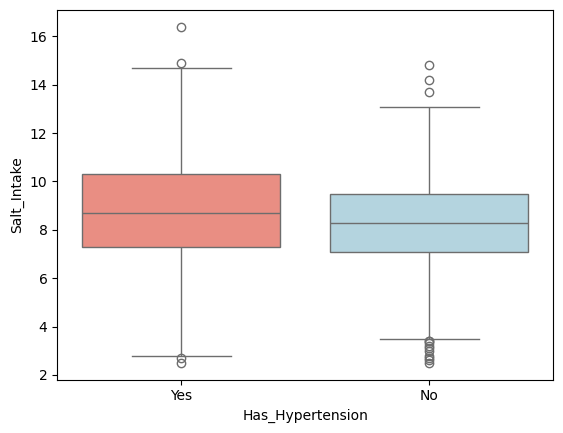

In [14]:
#Lets see the relation of salt intake with respect to hypertension
sns.boxplot(data,y=data['Salt_Intake'],x=data['Has_Hypertension'],hue="Has_Hypertension",palette={'Yes':"salmon",'No':"lightblue"});

**People with hypertension `(Yes)` have a higher median salt intake than those without.**

In [15]:
data.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


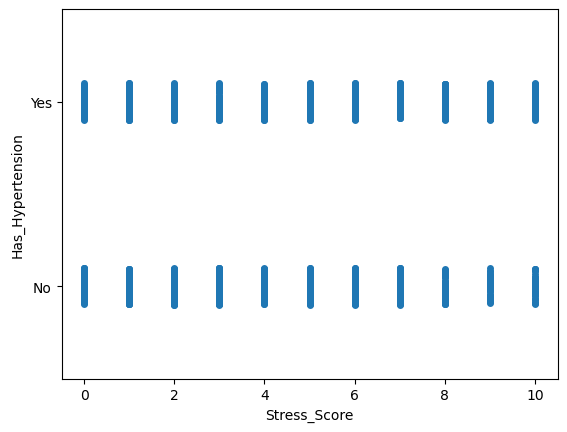

In [16]:
sns.stripplot(x="Stress_Score",y="Has_Hypertension",data=data,jitter=True);

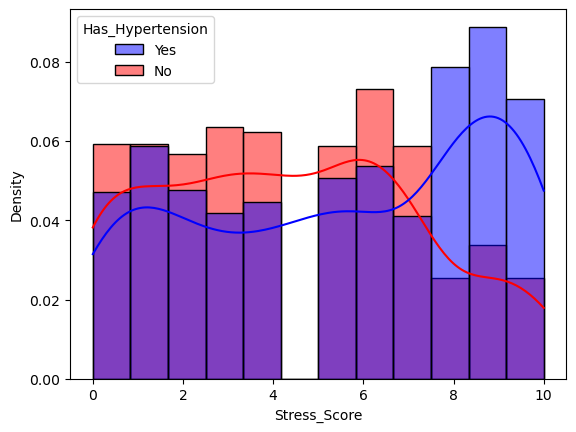

In [17]:
sns.histplot(data=data,x='Stress_Score',hue='Has_Hypertension',kde=True,stat='density',palette={'Yes':'Blue','No':'Red'});

**So people with more `Stress_Score` are more prone to suffer from `hypertension`.**

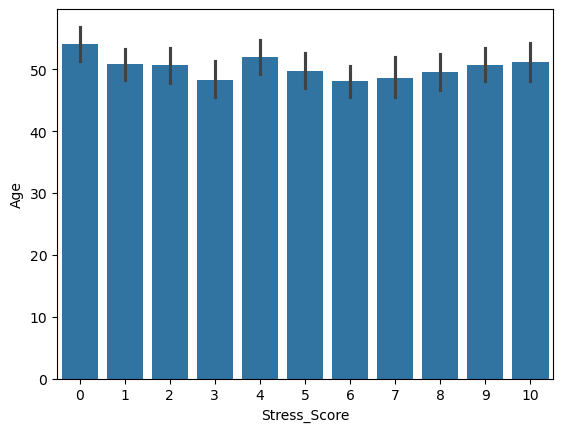

In [18]:
sns.barplot(y="Age",x="Stress_Score",data=data);

**So we can see there is no upward or downward trend in `Stress_Score` with respect to `Age`.**

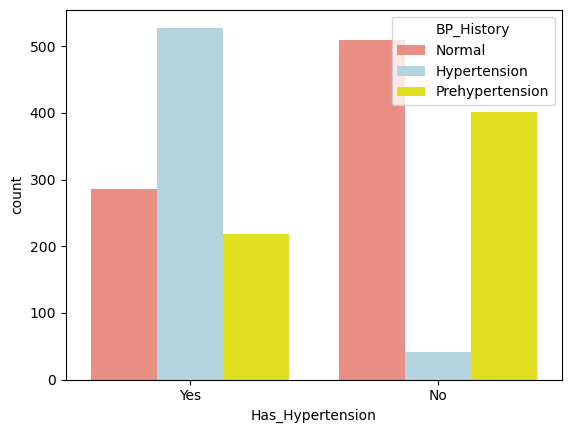

In [19]:
sns.countplot(data=data,x="Has_Hypertension",hue="BP_History",palette=["salmon","lightblue","yellow"]);

* People with normal BP has lower hypertension count.

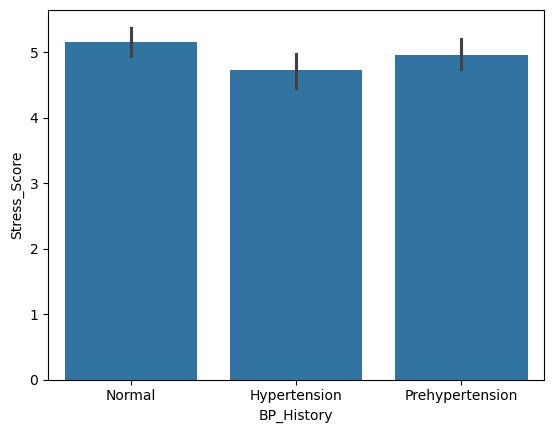

In [20]:
sns.barplot(y="Stress_Score",x="BP_History",data=data);

<Axes: xlabel='Sleep_Duration', ylabel='Has_Hypertension'>

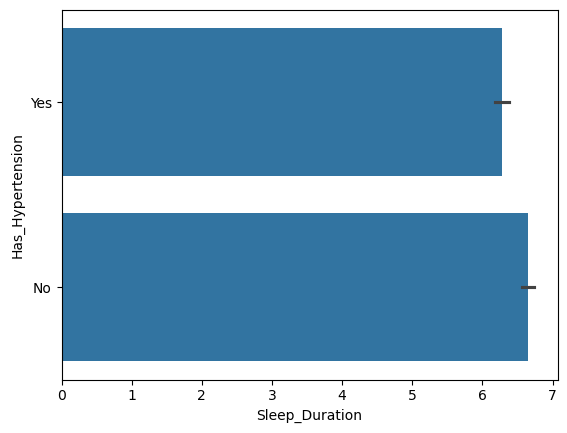

In [21]:
sns.barplot(data=data,x="Sleep_Duration",y="Has_Hypertension")

**People with higher average sleep duration suffers less from hypertension.**

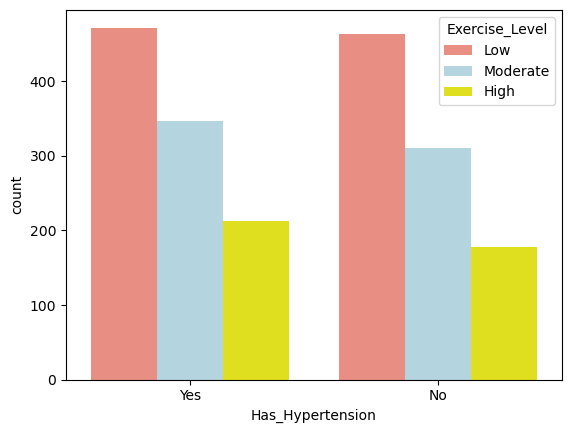

In [22]:
sns.countplot(data=data,x="Has_Hypertension",hue="Exercise_Level",palette=["salmon","lightblue","yellow"]);

In [31]:
data["Has_Hypertension_Binary"]=data["Has_Hypertension"].map({'Yes':1,'No':0})
data["Exercise_Level_Binary"]=data["Exercise_Level"].map({'Low':0,'Moderate':1,'High':2})

In [32]:
data.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension,Has_Hypertension_Binary,Exercise_Level_Binary
0,69,8.0,9,Normal,6.4,25.8,Yes,Low,Non-Smoker,Yes,1,0
1,32,11.7,10,Normal,5.4,23.4,No,Low,Non-Smoker,No,0,0
2,78,9.5,3,Normal,7.1,18.7,No,Moderate,Non-Smoker,No,0,1
3,38,10.0,10,Hypertension,4.2,22.1,No,Low,Non-Smoker,Yes,1,0
4,41,9.8,1,Prehypertension,5.8,16.2,No,Moderate,Non-Smoker,No,0,1


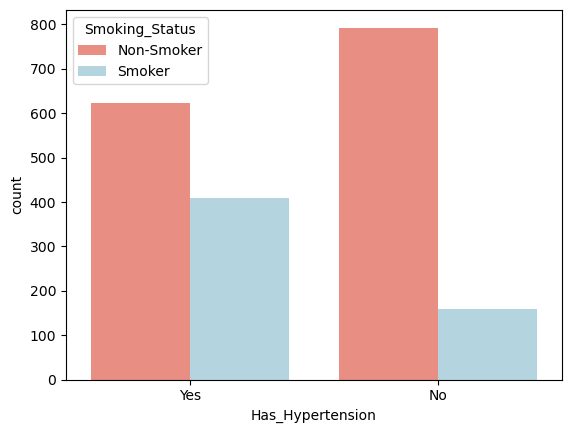

In [33]:
sns.countplot(data=data,hue="Smoking_Status",x="Has_Hypertension",palette=['salmon','lightblue']);

**Smokers suffers from hypertension but mostly non-smokers don't suffer from hypertension.**

In [34]:
data.drop("Medication",axis=1,inplace=True)

KeyError: "['Medication'] not found in axis"

In [35]:
data.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension,Has_Hypertension_Binary,Exercise_Level_Binary
0,69,8.0,9,Normal,6.4,25.8,Yes,Low,Non-Smoker,Yes,1,0
1,32,11.7,10,Normal,5.4,23.4,No,Low,Non-Smoker,No,0,0
2,78,9.5,3,Normal,7.1,18.7,No,Moderate,Non-Smoker,No,0,1
3,38,10.0,10,Hypertension,4.2,22.1,No,Low,Non-Smoker,Yes,1,0
4,41,9.8,1,Prehypertension,5.8,16.2,No,Moderate,Non-Smoker,No,0,1


Since Medication column data was missing around ~40% so we are dropping the column entirely to get a non-null dataset.

In [36]:
data.isna().sum()

Age                        0
Salt_Intake                0
Stress_Score               0
BP_History                 0
Sleep_Duration             0
BMI                        0
Family_History             0
Exercise_Level             0
Smoking_Status             0
Has_Hypertension           0
Has_Hypertension_Binary    0
Exercise_Level_Binary      0
dtype: int64

### Now let's change the cetegorical features into numerical features with the help of pandas.

In [37]:
data.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension,Has_Hypertension_Binary,Exercise_Level_Binary
0,69,8.0,9,Normal,6.4,25.8,Yes,Low,Non-Smoker,Yes,1,0
1,32,11.7,10,Normal,5.4,23.4,No,Low,Non-Smoker,No,0,0
2,78,9.5,3,Normal,7.1,18.7,No,Moderate,Non-Smoker,No,0,1
3,38,10.0,10,Hypertension,4.2,22.1,No,Low,Non-Smoker,Yes,1,0
4,41,9.8,1,Prehypertension,5.8,16.2,No,Moderate,Non-Smoker,No,0,1


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1985 non-null   int64  
 1   Salt_Intake              1985 non-null   float64
 2   Stress_Score             1985 non-null   int64  
 3   BP_History               1985 non-null   object 
 4   Sleep_Duration           1985 non-null   float64
 5   BMI                      1985 non-null   float64
 6   Family_History           1985 non-null   object 
 7   Exercise_Level           1985 non-null   object 
 8   Smoking_Status           1985 non-null   object 
 9   Has_Hypertension         1985 non-null   object 
 10  Has_Hypertension_Binary  1985 non-null   int64  
 11  Exercise_Level_Binary    1985 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 186.2+ KB


These features are categorical and have to be changed to numeric forms-
1. BP_History  
2. Family_History        
3. Exercise_Level          
4. Smoking_Status           
5. Has_Hypertension   

We already made the binary forms of `Has_Hypertension` and `Exercise_Level` so we can just drop the object columns

In [39]:
bp_history=pd.get_dummies(data["BP_History"],drop_first=True)
family_history=pd.get_dummies(data["Family_History"],drop_first=True)
smoking_status=pd.get_dummies(data["Smoking_Status"],drop_first=True)

In [40]:
data.drop("BP_History",axis=1,inplace=True)
data.drop("Family_History",axis=1,inplace=True)
data.drop("Exercise_Level",axis=1,inplace=True)
data.drop("Smoking_Status",axis=1,inplace=True)
data.drop("Has_Hypertension",axis=1,inplace=True)

In [41]:
data=pd.concat([data,bp_history,family_history,smoking_status],axis=1)

In [42]:
data.head()

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI,Has_Hypertension_Binary,Exercise_Level_Binary,Normal,Prehypertension,Yes,Smoker
0,69,8.0,9,6.4,25.8,1,0,True,False,True,False
1,32,11.7,10,5.4,23.4,0,0,True,False,False,False
2,78,9.5,3,7.1,18.7,0,1,True,False,False,False
3,38,10.0,10,4.2,22.1,1,0,False,False,False,False
4,41,9.8,1,5.8,16.2,0,1,False,True,False,False


In [43]:
data.rename(columns={"Yes":"Family_History","Normal":"Normal_BP","Prehypertension":"Pre_hypertension_BP"},inplace=True)

In [44]:
data.head()

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI,Has_Hypertension_Binary,Exercise_Level_Binary,Normal_BP,Pre_hypertension_BP,Family_History,Smoker
0,69,8.0,9,6.4,25.8,1,0,True,False,True,False
1,32,11.7,10,5.4,23.4,0,0,True,False,False,False
2,78,9.5,3,7.1,18.7,0,1,True,False,False,False
3,38,10.0,10,4.2,22.1,1,0,False,False,False,False
4,41,9.8,1,5.8,16.2,0,1,False,True,False,False


## Choosing the correct model for the dataset

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,precision_score,RocCurveDisplay,roc_auc_score,f1_score

In [51]:
#Splitting the data
X=data.drop("Has_Hypertension_Binary",axis=1)
y=data["Has_Hypertension_Binary"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
models={
    "Logistic_Regression":LogisticRegression(),
    "Random_Forest_Classifier":RandomForestClassifier()
}
result={}
for label,model in models.items():
    model.fit(X_train,y_train)
    value=model.score(X_test,y_test)
    result[label]=value
print(result)

C:\Users\USER\Desktop\heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic_Regression': 0.8790931989924433, 'Random_Forest_Classifier': 0.9496221662468514}


#### Hyperparameter Tuning using Randomized Search CV

In [56]:
#Hyperparameter tuning
np.random.seed(42)
rs_log_grid={
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}
rs_model=RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rs_log_grid,
    n_iter=20,
    cv=5,
    verbose=True
)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [57]:
rs_model.best_params_

{'n_estimators': np.int64(710),
 'min_samples_split': np.int64(16),
 'min_samples_leaf': np.int64(3),
 'max_depth': 10}

In [58]:
rs_model.score(X_test,y_test)

0.9622166246851386

In [59]:
y_preds=rs_model.predict(X_test)

#### Evaluation of the hyperparameter tuned better model

In [60]:
from sklearn.model_selection import cross_val_score

In [63]:
model=RandomForestClassifier(random_state=42,n_estimators=710,max_depth=10,min_samples_leaf=3,min_samples_split=16)

In [64]:
cvv_prec=cross_val_score(
    model,
    X,
    y,
    cv=5,
    scoring="precision"
)
cvv_prec

array([0.93838863, 0.98469388, 0.96585366, 0.95098039, 0.96618357])

In [66]:
cvv_prec=np.mean(cvv_prec)
cvv_prec

np.float64(0.9612200257432224)

In [67]:
cvv_f1=cross_val_score(
    model,
    X,
    y,
    cv=5,
    scoring="f1"
)
cvv_f1

array([0.94736842, 0.95781638, 0.96350365, 0.94634146, 0.968523  ])

In [70]:
cvv_f1=np.mean(cvv_f1)
cvv_f1

np.float64(0.9567105827389651)

In [72]:
roc_score=roc_auc_score(y_test,y_preds)
roc_score

np.float64(0.9625889227642276)

#### Roc Curve Display

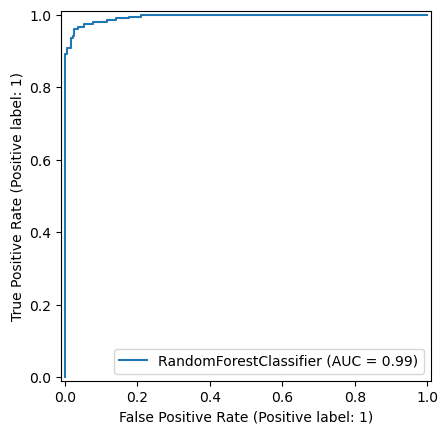

In [77]:
model.fit(X_train,y_train)
RocCurveDisplay.from_estimator(model,X_test,y_test);

In [79]:
#Lets check for the first 10 thresholds from the roc_curve
from sklearn.metrics import roc_curve

y_prob=model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
for i in range(10):
    print(f"Threshold:{thresholds[i]:.2f},tpr:{tpr[i]:.2f},fpr:{fpr[i]:.2f}")

Threshold:inf,tpr:0.00,fpr:0.00
Threshold:0.98,tpr:0.00,fpr:0.00
Threshold:0.56,tpr:0.89,fpr:0.00
Threshold:0.56,tpr:0.89,fpr:0.01
Threshold:0.56,tpr:0.91,fpr:0.01
Threshold:0.55,tpr:0.91,fpr:0.02
Threshold:0.52,tpr:0.94,fpr:0.02
Threshold:0.52,tpr:0.94,fpr:0.02
Threshold:0.51,tpr:0.94,fpr:0.02
Threshold:0.51,tpr:0.94,fpr:0.03


#### Confusion Matrix

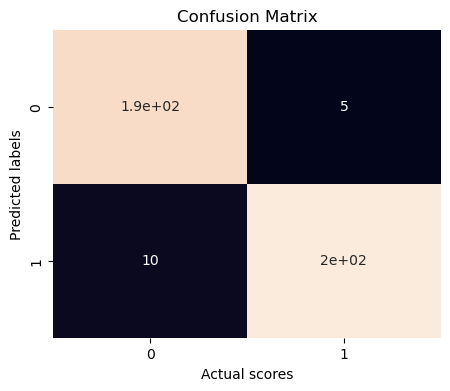

In [83]:
def plot_conf_matrix(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(5,4))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Actual scores")
    plt.ylabel("Predicted labels")
plot_conf_matrix(y_test,y_preds)

In [84]:
y_preds

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,

In [101]:
y_preds_text=pd.DataFrame(y_preds,columns=["Predictions"])

In [111]:
y_preds_text.drop("Yes",axis=1,inplace=True)

In [112]:
y_preds_text.drop("No",axis=1,inplace=True)

In [113]:
y_preds_text

,Predictions
0,0
1,1
2,1
3,0
4,0
...,...
392,1
393,0
394,0
395,0


In [117]:
y_preds_text["Predictions"]=y_preds_text["Predictions"].map({0:"No",1:"Yes"})

In [118]:
y_preds_text

,Predictions,Prediction
0,No,No
1,Yes,Yes
2,Yes,Yes
3,No,No
4,No,No
...,...,...
392,Yes,Yes
393,No,No
394,No,No
395,No,No


In [121]:
y_preds_text.drop("Prediction",axis=1,inplace=True)

In [122]:
y_preds_text

,Predictions
0,No
1,Yes
2,Yes
3,No
4,No
...,...
392,Yes
393,No
394,No
395,No


## Feature Importance

In [125]:
#Feature Importance
model.feature_importances_

array([0.12108618, 0.07905659, 0.11239587, 0.07707201, 0.08492102,
       0.00740606, 0.16388879, 0.17365471, 0.10512912, 0.07538965])

In [129]:
feature_importances=pd.DataFrame({
    "features":X.columns,
    "importance":model.feature_importances_
}).sort_values(by="importance",ascending=False)
print(feature_importances)

                features  importance
7    Pre_hypertension_BP    0.173655
6              Normal_BP    0.163889
0                    Age    0.121086
2           Stress_Score    0.112396
8         Family_History    0.105129
4                    BMI    0.084921
1            Salt_Intake    0.079057
3         Sleep_Duration    0.077072
9                 Smoker    0.075390
5  Exercise_Level_Binary    0.007406


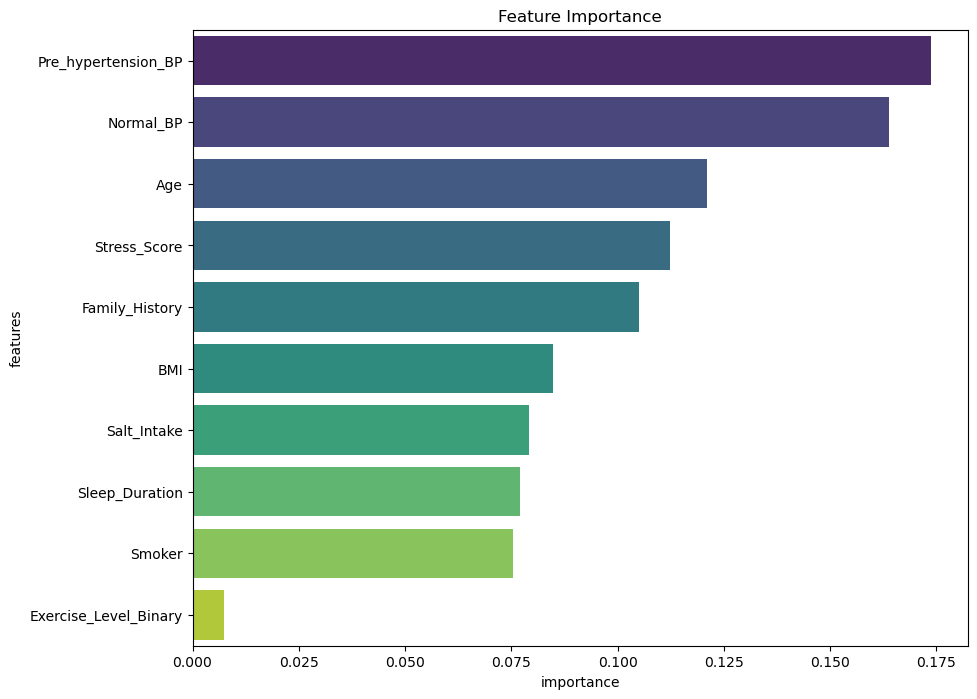

In [136]:
plt.figure(figsize=(10,8))
sns.barplot(data=feature_importances,y="features",x="importance",hue="features",palette="viridis")
plt.title("Feature Importance");